In [1]:
from numpy import *

In [30]:
import matplotlib
matplotlib.style.use('publication23')

In [31]:
mRs = ['', '085', '095']
masses = [0.75, 0.85, 0.95]

In [32]:
trange = arange(0.15, 0.5, 0.05)

Load data from Zhanduo

In [185]:
f_SE = h5py.File('../../../FromZhanduo/SelfE_single.h5')

list(f_SE.keys())

ds_SE = f_SE['lightp']

ds_Im = ds_SE[1, :, :]

df_Im = []

for i in range(121):
    df_Im += [ds_Im[i::121]]
    
df_Im = array(df_Im)

df_Im_vals = zeros([121, 61])

for i in range(121):
    for j in range(61):
        df_Im_vals[i, j] = df_Im[i, j, -1]

ds_Re = ds_SE[0, :, :]

df_Re = []

for i in range(121):
    df_Re += [ds_Re[i::121]]
    
df_Re = array(df_Re)

df_Re_vals = zeros([121, 61])

for i in range(121):
    for j in range(61):
        df_Re_vals[i, j] = df_Re[i, j, -1]
        
erange_SF = arange(-1, 5.01, 0.05)
qrange_SF = arange(0, 3.01, 0.05)

In [163]:
pQs = []
pSs = []
Phis = []

for mR in mRs:
    if mR != '':
        folder = '../run/output/Q_1ch_onshell_' + mR + '/'
    else:
        folder = '../run/output/Q_1ch_onshell/'
    
    pQs += [loadtxt(folder + 'p_Q.dat')]
    pSs += [loadtxt(folder + 'p_S.dat')]
    Phis += [loadtxt(folder + 'phi.dat')]

In [164]:
lss = ['-', '--', ':']

Text(0.5, 0, 'T [GeV]')

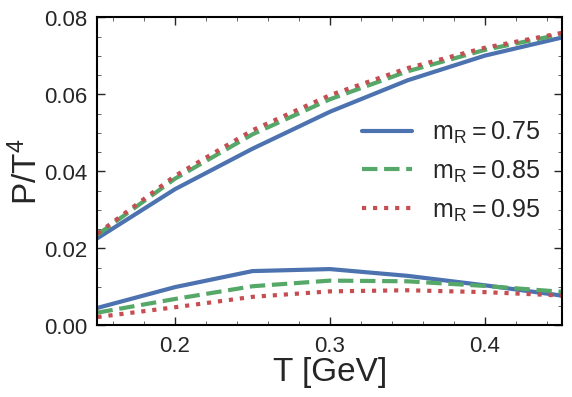

In [165]:
for pQ, pS, phi, ls, m in zip(pQs, pSs, Phis, lss, masses):
    l_p, = plt.plot(trange, 3*phi/trange**4, ls=ls, label=r'$m_R = %.2f$'%m)
    plt.plot(trange, (pQ - pS)/trange**4, ls=ls, c=l_p.get_c())
    
#     plt.plot(trange, (pQ - pS + 3*phi)/trange**4, ls=ls, c=l_p.get_c())
    
    
plt.legend()

plt.ylim(0, 0.08)
plt.ylabel('$P/T^4$')

plt.xlabel('T [GeV]')

In [172]:
SFss = []
sigma_totss = []
TMss = []
eranges = []


for mR in mRs:
    if mR != '':
        folder = '../run/output/Q_1ch_onshell_' + mR + '/'
    else:
#         folder = '../run/output/Q_1ch_onshell_085_narrow/'
        folder = '../run/output/Q_1ch_onshell/'
    
    eranges += [np.loadtxt(folder + 'erange_T=0.200.dat')]
        
            
T_plot = [0.2, 0.3, 0.4]
for T in T_plot:
    SFs = []
    sigma_tots = []
    TMs = []
    
    for mR in mRs:
        if mR != '':
            folder = '../run/output/Q_1ch_onshell_' + mR + '/'
        else:
#             folder = '../run/output/Q_1ch_onshell_085_narrow/'
            folder = '../run/output/Q_1ch_onshell/'        
        SFs += [np.loadtxt(folder + 'Q_Rho_T=%.3f.dat'%T)]
        sigma_tots += [np.loadtxt(folder + 'Q_S_T=%.3f.dat'%T, dtype=complex)]
        TMs += [np.loadtxt(folder + 'Q_TM_qa1_T=%.3f.dat'%T, dtype=complex)]
        print(trapz(SFs[-1][:, 0], x=eranges[0]))
    SFss += [SFs]
    sigma_totss += [sigma_tots]
    TMss += [TMs]

0.9999984349461066
1.0000000362156303
1.0000017682787006
1.0000025494974671
0.9999991455006477
0.9999988181247936
0.9999997017080445
1.0000018670137747
0.9999996093478342


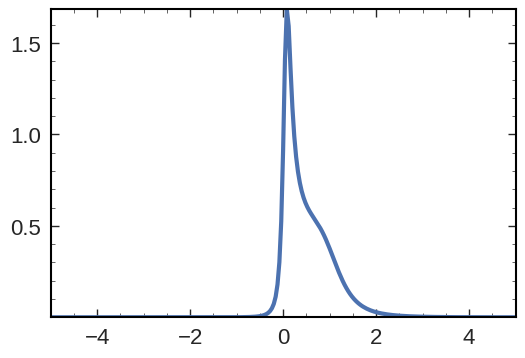

In [173]:
plt.plot(eranges[0], SFss[2][2][:, 0])
# plt.xlim(,)

In [191]:
f_SF = h5py.File('../../../FromZhanduo/SF.h5')

list(f_SF.keys())

ds_SF = f_SF['lightp']
ds_SF.shape

ds_SF[0], ds_SF[1], ds_SF[2]

len(arange(-1, 5.01, 0.05)), len(arange(0, 3.01, 0.05))

df_Q = []

for i in range(121):
    df_Q += [ds_SF[i::121]]
    
df_Q = array(df_Q)

df_vals = zeros([121, 61])

for i in range(121):
    for j in range(61):
        df_vals[i, j] = df_Q[i, j, -1]

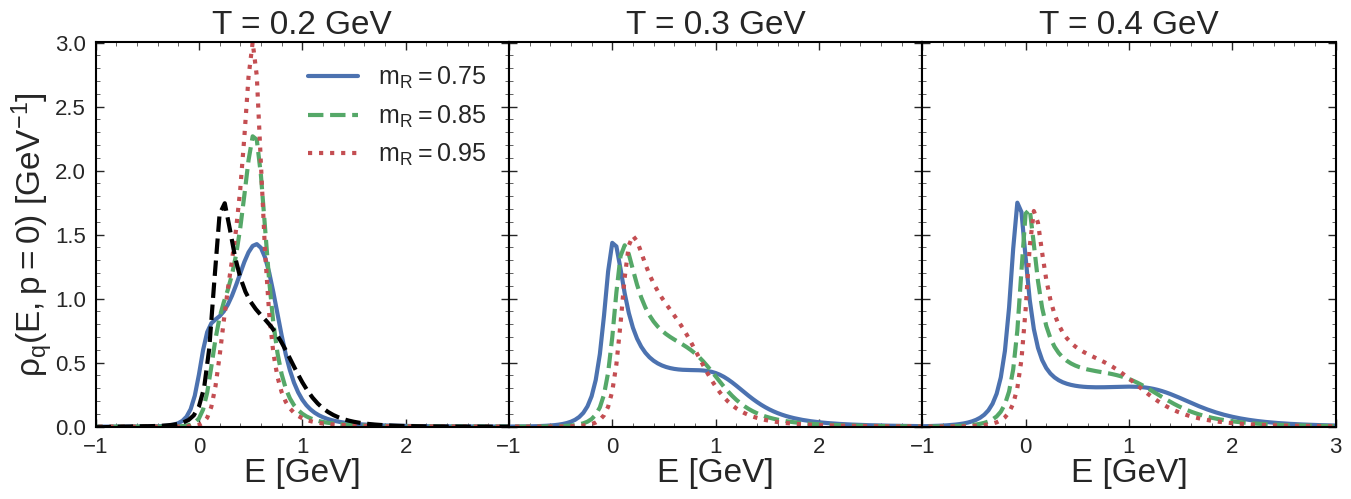

In [193]:
fig, ax = plt.subplots(1, 3, figsize=(16,5), sharey='all')

fig.subplots_adjust(wspace=0)
ax[0].set_xticks([-1, 0, 1, 2])
ax[1].set_xticks([-1, 0, 1, 2])

for i, T, _ax in zip(range(3), T_plot, ax):
    _ax.set_title('T = %.1f GeV'%T)
    _ax.set_xlim(-1, 3)
    SFs = SFss[i]
    for j, mr, SF, ls, m in zip(range(3), mRs, SFs, lss, masses):
        _ax.plot(eranges[j], SF[:, 0], ls=ls, label=r'$m_R = %.2f$'%m)
        
ax[0].set_ylabel(r'$\rho_q(E, p=0)$ [$GeV^{-1}$]')

for _ in ax:
    _.set_xlabel('E [GeV]')
    
ax[0].legend(loc='upper right')

ax[0].plot(erange_SF, df_vals[:, 0], c='black', ls='--')

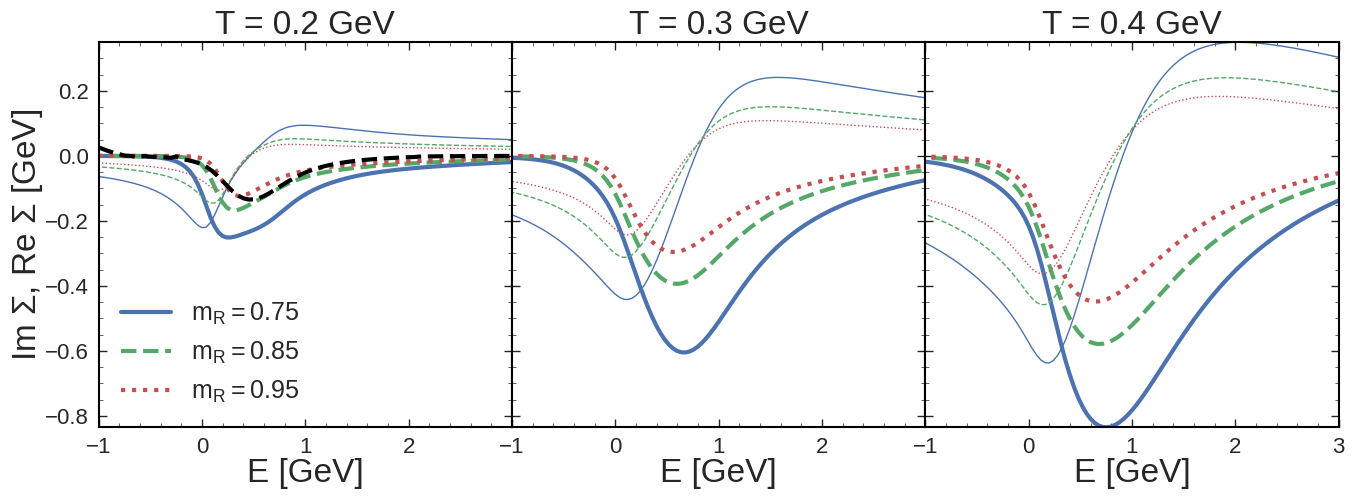

In [194]:
fig, ax = plt.subplots(1, 3, figsize=(16,5), sharey='all')

fig.subplots_adjust(wspace=0)
ax[0].set_xticks([-1, 0, 1, 2])
ax[1].set_xticks([-1, 0, 1, 2])

for i, T, _ax in zip(range(3), T_plot, ax):
    _ax.set_title('T = %.1f GeV'%T)
    _ax.set_xlim(-1, 3)
    SFs = sigma_totss[i]
    for j, mr, SF, ls, m in zip(range(3), mRs, SFs, lss, masses):
        l, = _ax.plot(eranges[j], imag(SF[:, 0]), ls=ls, label=r'$m_R = %.2f$'%m)
        _ax.plot(eranges[j], real(SF[:, 0]), ls=ls, lw=1, c=l.get_c())
        
ax[0].legend()

ax[0].set_ylabel(r'Im $\Sigma$, Re $\Sigma$ [GeV]')


for _ in ax:
    _.set_xlabel('E [GeV]')
    
ax[0].plot(erange_SF, df_Im_vals[:, 0], c='black', ls='--')

In [178]:
import h5py
f = h5py.File('../../../FromZhanduo/TmDataEpc.h5')

list(f.keys())

list(f['0.99Tc']['lightplightn'].keys())

ds = f['0.99Tc']['lightplightn']['Ca1']['wave0']

ds_1 = f['0.99Tc']['lightplightn']['Ca2']['wave0']

ds.shape

imT = ds[1, :, :] + 0*ds_1[1, :, :]
reT = ds[0, :, :]

erange_T = arange(0, 9.01, 0.05)
qrange_T = arange(0, 6.01, 0.05)

/usr/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.1 when it was built against 1.14.0, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


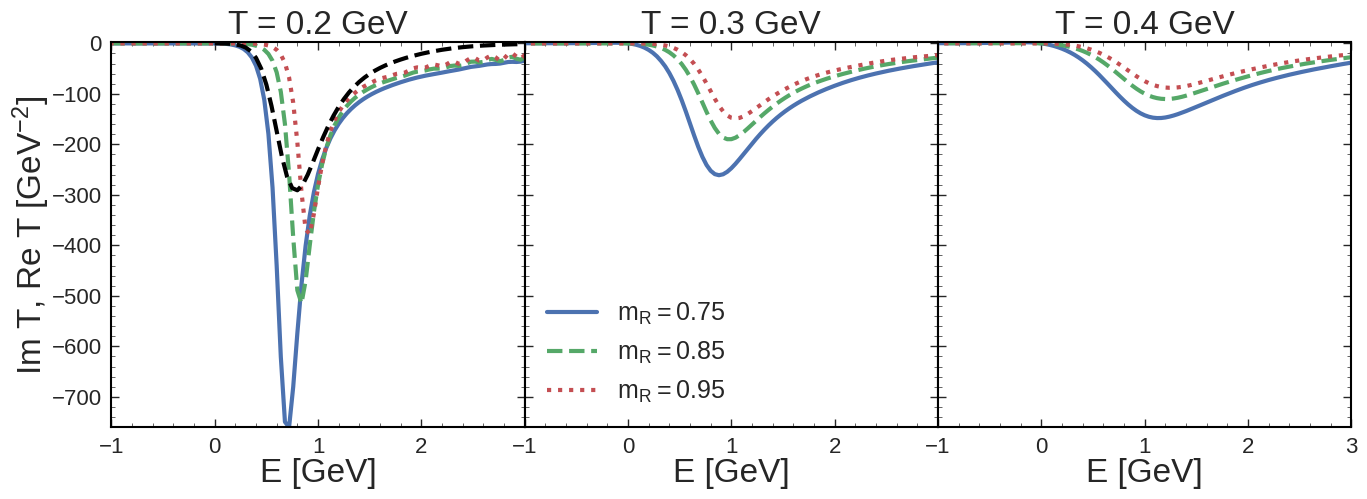

In [190]:
fig, ax = plt.subplots(1, 3, figsize=(16,5), sharey='all')

fig.subplots_adjust(wspace=0)
ax[0].set_xticks([-1, 0, 1, 2])
ax[1].set_xticks([-1, 0, 1, 2])

for i, T, _ax in zip(range(3), T_plot, ax):
    _ax.set_title('T = %.1f GeV'%T)
    _ax.set_xlim(-1, 3)
    SFs = TMss[i]
    for j, mr, SF, ls, m in zip(range(3), mRs, SFs, lss, masses):
        l, = _ax.plot(eranges[j], imag(SF[:, 0]), ls=ls, label=r'$m_R = %.2f$'%m)
#         _ax.plot(eranges[j], real(SF[:, 0]), ls=ls, lw=1, c=l.get_c())
        
ax[1].legend()
ax[0].set_ylabel(r'Im T, Re T [GeV$^{-2}$]')
for _ in ax:
    _.set_xlabel('E [GeV]')
    
ax[0].plot(erange_T, 4*pi*imT[:, 0], c='black', ls='--')